# SMI Post Analysis
--> Version 1, Dev March 2, 2018
    Load Qmap and do circular average

In [1]:
%matplotlib notebook
from pySMI.smi_libs import *
from pySMI.smi_package import *
plt.rcParams.update({'figure.max_open_warning': 0})
plt.rcParams.update({ 'image.origin': 'lower'   })
plt.rcParams.update({ 'image.interpolation': 'none'   })

from databroker import Broker
db = Broker.named('smi')

/opt/conda_envs/analysis/lib/python3.6/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [2]:
from skimage.draw import line_aa, line, polygon, ellipse, circle

In [3]:
%run ~/pySMI/pySMI/smi_circular_average.py

## Define input data path

In [4]:
inDir0 = '/GPFS/xf12id1/analysis/2018_1/302771a/Results/Steven/'
ResDir = os.path.join( inDir0, 'PostAnalysis' +'/' )
os.makedirs(ResDir, exist_ok=True)
print('Results from this analysis will be stashed in the directory %s' % ResDir)

Results from this analysis will be stashed in the directory /GPFS/xf12id1/analysis/2018_1/302771a/Results/Steven/PostAnalysis/


In [5]:
sam = 'T80t_x5.9_'
inDir = '/GPFS/xf12id1/analysis/2018_1/302771a/Results/Steven/%s/'%sam

In [6]:
qmap_fp = 'T80t_x5.9_Qmap_pos=22.tif'
qx_fp =  'T80t_x5.9_Qmap_qx_cor_pos=22.txt'
qz_fp =  'T80t_x5.9_Qmap_qz_cor_pos=22.txt'

In [7]:
#!ls /GPFS/xf12id1/analysis/2018_1/302771a/Results/Steven/T80t_x5.9_/

In [8]:
xs = np.loadtxt(  inDir + qx_fp   )
zs = np.loadtxt(  inDir + qz_fp   )
qmap = np.array(  PIL.Image.open(  inDir + qmap_fp   ).convert('I') )



In [9]:
qmap.shape, len(xs), len(zs)

((591, 764), 764, 591)

In [10]:
np.argmin(np.abs(xs)), np.argmin(np.abs(zs))

(0, 79)

In [11]:
vmin= 5
vmax= 3e3
center = [79, 0 ]

In [16]:
%run /home/yuzhang/pySMI/pySMI/smi_generic_functions.py

In [36]:
mask = np.ones_like(qmap, dtype=bool)
mask[:,:100] = 0 
mask[ 240:250] = 0 
mask[ 440:450] = 0 
ring_mask = create_ring_mask(  mask.shape,  750,  center=[0, 79]  )

mask *= ring_mask

In [37]:
#show_img(ring_mask)

<IPython.core.display.Javascript object>


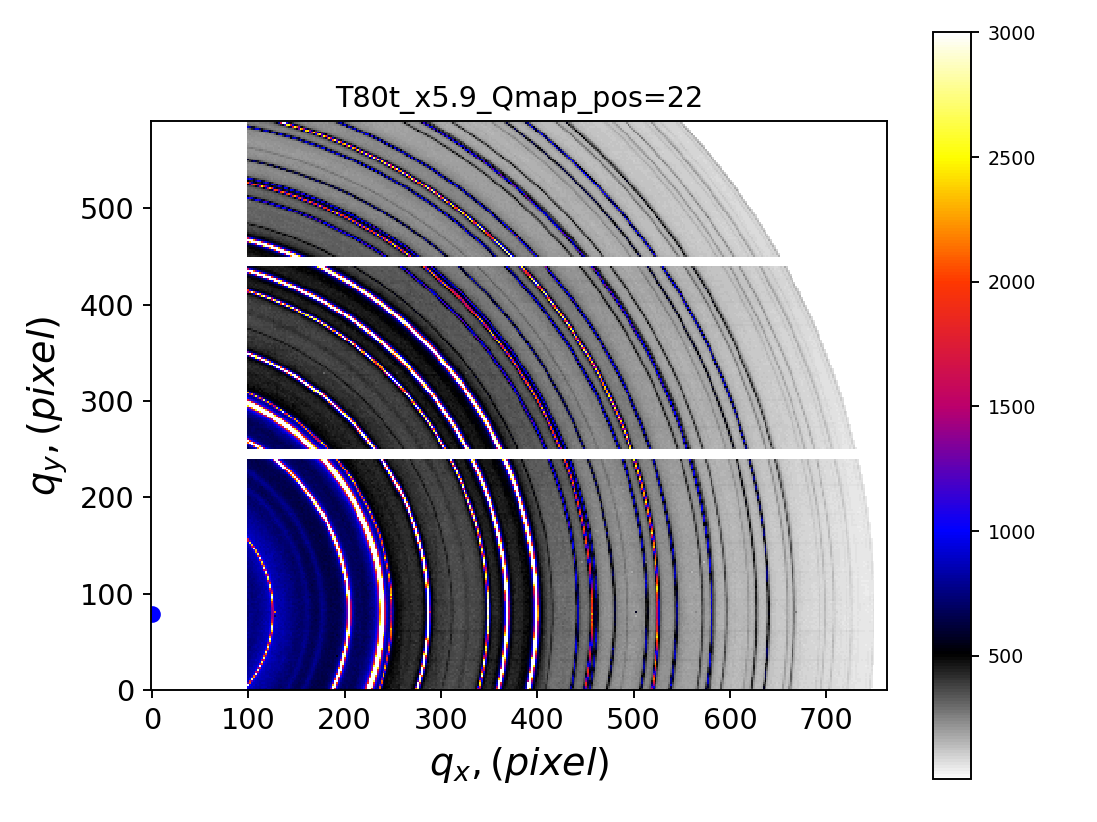

In [38]:
show_img(qmap * mask, logs = False,  vmin=  vmin, vmax= vmax,
         #extent=[xs[0], xs[-1], zs[0],zs[-1]], 
         xlabel='$q_x , (pixel)$',  ylabel='$q_y , (pixel)$',
         cmap = cmap_vge_hdr,  aspect=1, center=center[::-1],
         image_name = qmap_fp[:-4], dpi=500, save=False, path=ResDir)

<IPython.core.display.Javascript object>


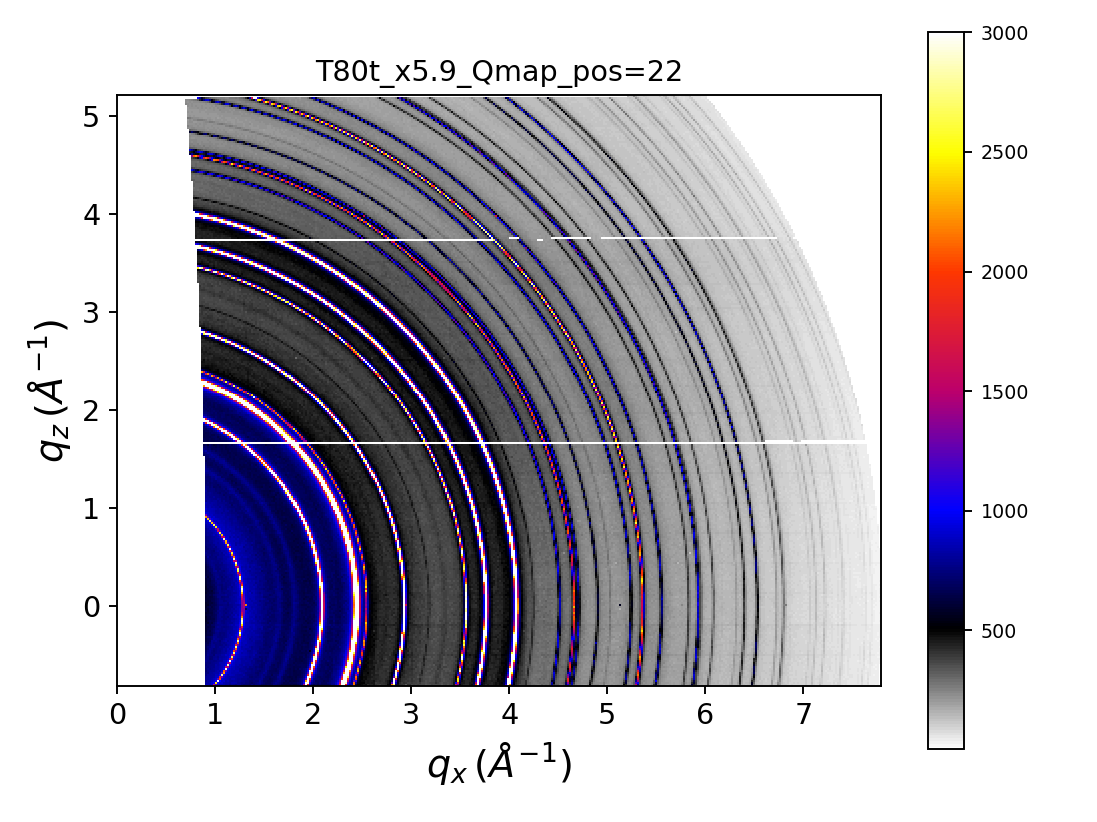

In [35]:


show_img(qmap, logs = False,  vmin=  vmin, vmax= vmax,
         extent=[xs[0], xs[-1], zs[0],zs[-1]], 
         xlabel='$q_x \, (\AA^{-1})$',  ylabel='$q_z \, (\AA^{-1})$', 
         cmap = cmap_vge_hdr,  aspect=1, center=center[::-1],
         image_name = qmap_fp[:-4], dpi=500, save=False, path=ResDir)



# Do Circular Average here

In [39]:
energy = 16.1  

setup_pargs =  {'Ldet':  27.5,  
 'center': [79,0],
 'dpix': 0.172,  
 'lambda_': 12.39842/energy,
 'path': ResDir,
 'uid': sam,
}


In [40]:
%run ~/pySMI/pySMI/smi_circular_average.py

In [41]:
#hmask = create_hot_pixel_mask( qmap, threshold = 1e-1, center=center, center_radius= 800) #*Chip_Mask
qp_saxs, iq_saxs, q_saxs = get_circular_average( qmap*mask , mask, pargs=setup_pargs  )


<IPython.core.display.Javascript object>


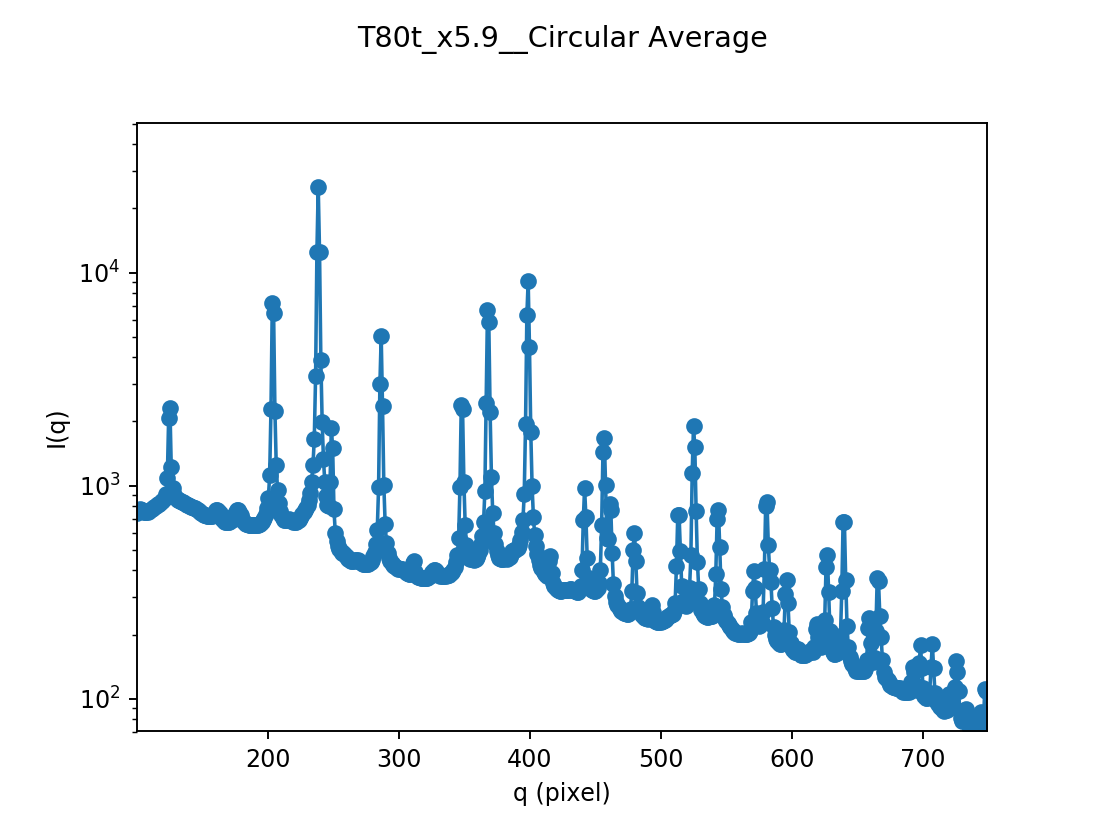

In [42]:
plot_circular_average( qp_saxs, iq_saxs, q_saxs,  pargs=setup_pargs, show_pixel=True,
                      xlim=[qp_saxs.min(), qp_saxs.max()*1.0], ylim = [iq_saxs.min(), iq_saxs.max()*2] )

<IPython.core.display.Javascript object>


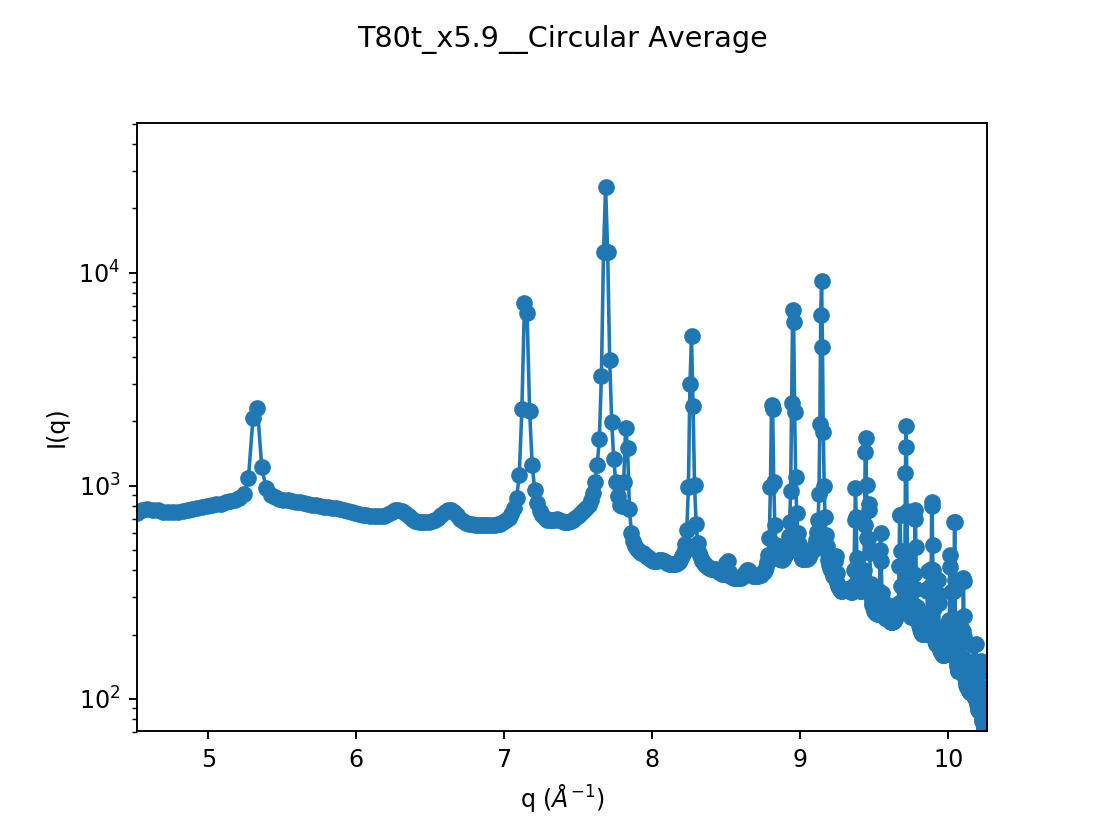

In [43]:
plot_circular_average( qp_saxs, iq_saxs, q_saxs,  pargs=setup_pargs, show_pixel=False,
                      xlim=[q_saxs.min(), q_saxs.max()*1.0], ylim = [iq_saxs.min(), iq_saxs.max()*2] )